# Timing Exercises

In the following exercises, we will practice some basics of timing analysis.



In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np

## 1. Simulating white noise 

As a simple warm-up exercise, let's look at the power spectrum of white noise. White noise is a process without variability: a constant flux with time, modified by some kind of statistical uncertainty due to the details of the detector. 

Let's first make some Poisson data with the following properties:
* length of the light curve: 16 seconds
* time steps in light curve: 1024\*16 time bins
* constant amplitude: 10 counts/bin

1. What is the count rate in counts per second?
2. make a time series with the property above, then add Poisson noise: for each value of your model, pick from a Poisson distribution with a rate parameter equal to the value of your model at that bin (Hint: the `numpy.random` module is your friend!)
3. Plot the results
4. Do the same for Gaussian noise with the same mean and variance and compare the two. Are the statistical properties (e.g. mean and variance) the same?


<IPython.core.display.Javascript object>


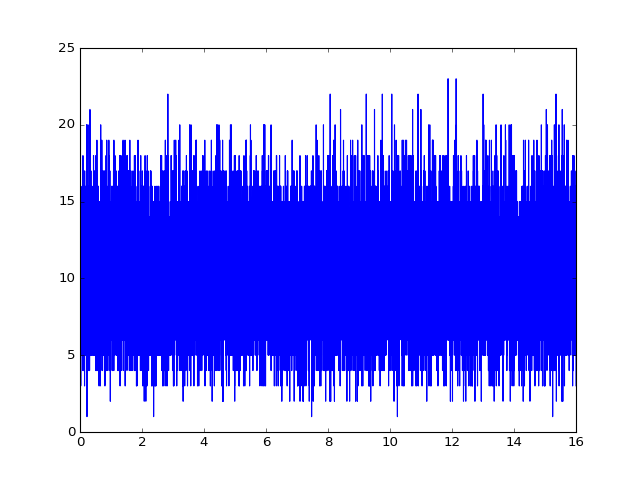

In [2]:
# define data
tstart = 0.0 # start time of light curve
tend = 16.0 # end time of light curve
nbins = 1024*16 # number of bins
dt = (tend-tstart)/nbins # time resolution
rate = 10.0

# the time steps
time = np.linspace(tstart, tend, nbins)

# array of the values of the process that produces our data
process = np.ones_like(time)*rate

# Sample from Poisson distribution
counts = np.random.poisson(process)

# plot the results
plt.figure()
plt.plot(time, counts, linestyle="steps-mid")



Doesn't look like much, does it? 

You now have time bins, and counts per bin for each of those time bins. Let's now make a power spectrum.
The power spectrum is the square of the Fourier transform (which is implemented in both `numpy` and `scipy`). However, in Stingray, we've already implemented the power spectrum as it is often used in (time series) astronomy. In order to use the Stingray definition, you'll first need to put your light curve into a `Lightcurve` object. This is a structure that's designed to help you with common tasks you might do with light curves.

You can call `Lightcurve` like this:

    In []: from stingray import Lightcurve
    In []: lc = Lightcurve(time, counts)
    
Typing `Lightcurve(` and pressing shift-tab should give you access to the docstring, which documents the common features of this object.

In [3]:
from stingray import Lightcurve, Powerspectrum

In [4]:
lc = Lightcurve(time, counts)

Once you've done this, you can compute the power spectrum using the `Powerspectrum` class in Stingray:

    In []: from stingray import Powerspectrum
    In []: ps = Powerspectrum(lc)
    
By default, this object uses something called the fractional rms normalization. This is useful, because if you multiply each power by its frequencies, you can add up powers in any frequency range in order to directly compute the variance in the light curve at those time scales. 

However, for characterizing our sine wave, the Leahy normalization is more useful (because we know exactly what the statistical distribution for pure Poisson noise will be). So go ahead and when calling `Powerspectrum`, use the parameter `norm="leahy"` in order to tell the code to use Leahy normalization instead. 



<IPython.core.display.Javascript object>


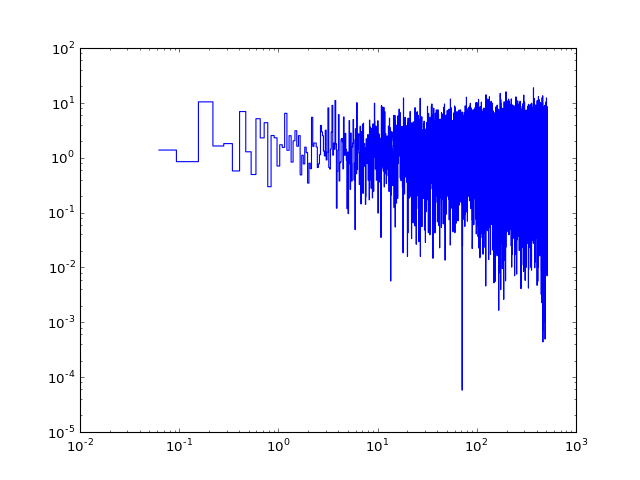

In [5]:
ps = Powerspectrum(lc, norm="leahy")

plt.figure()
plt.loglog(ps.freq, ps.power, linestyle="steps-mid")

That doesn't look super exciting, either. Let's redo this with Gaussian noise. Remember that for the Poisson distribution, the mean and the variance are the same as the rate:

<IPython.core.display.Javascript object>


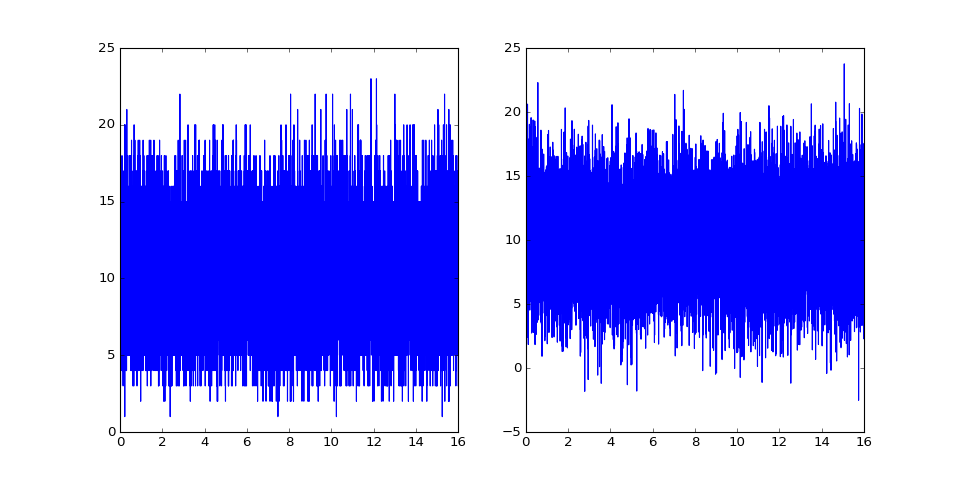

In [6]:
counts_gauss = np.random.normal(loc=rate, scale=np.sqrt(rate), size=len(time))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(time, counts, linestyle="steps-mid")
ax2.plot(time, counts_gauss, linestyle="steps-mid")

They don't quite look the same, of course. Let's compare the power spectra, too:

<IPython.core.display.Javascript object>


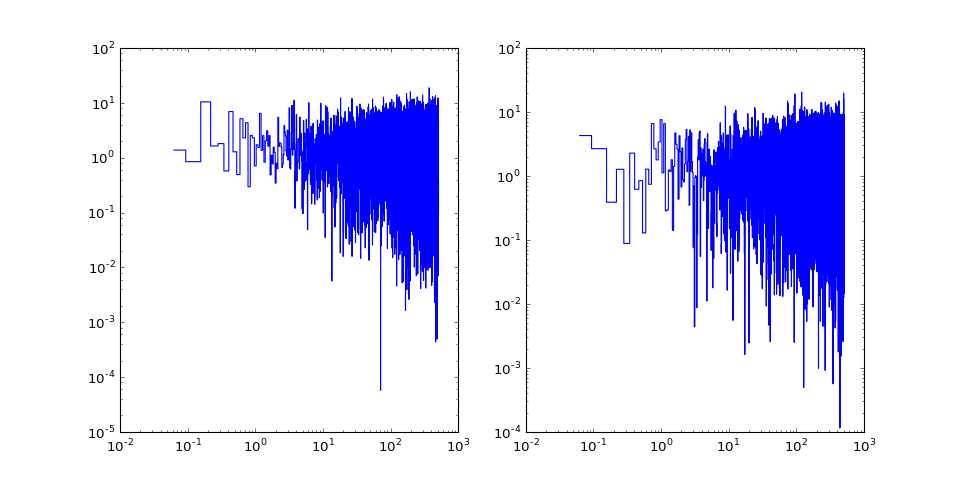

In [7]:
lc_gauss = Lightcurve(time, counts_gauss)
ps_gauss = Powerspectrum(lc_gauss, norm="leahy")

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.loglog(ps.freq, ps.power, linestyle="steps-mid")
ax2.loglog(ps_gauss.freq, ps_gauss.power, linestyle="steps-mid")

That looks very similar! Power spectral statistics, the way we've defined it this morning, works for Poisson and Gaussian data, but also for other types of statistical distributions.

## 2. Simulating a periodic signal

Second warm-up exercise: let's see what the power spectrum of a simple sine wave looks like. Use the following parameters:
* length of the light curve: 16 seconds
* time steps in light curve: 1024\*16 time bins
* period of the sine wave: 0.01
* constant background amplitude: 10 counts/bin

Here are the steps you need to go through:
1. Define a sine wave
2. Compute the value of the sine wave + background at each time step
3. For a realistic data set, we'll include Poisson counting statistics: for each value of your model, pick from a Poisson distribution with a rate parameter equal to the value of your model at that bin.
4. Plot the result

In [8]:
tstart = 0.0 # start time of light curve
tend = 16.0 # end time of light curve
nbins = 1024*16 # number of bins
dt = (tend-tstart)/nbins # time resolution

bkg = 10.0
period = 0.012
amplitude = 1.0

# array of time bins
time = np.linspace(tstart, tend, nbins)

# array of the values of the process that produces our data
process = amplitude*np.sin(2.*np.pi*time/period) + bkg 

<IPython.core.display.Javascript object>


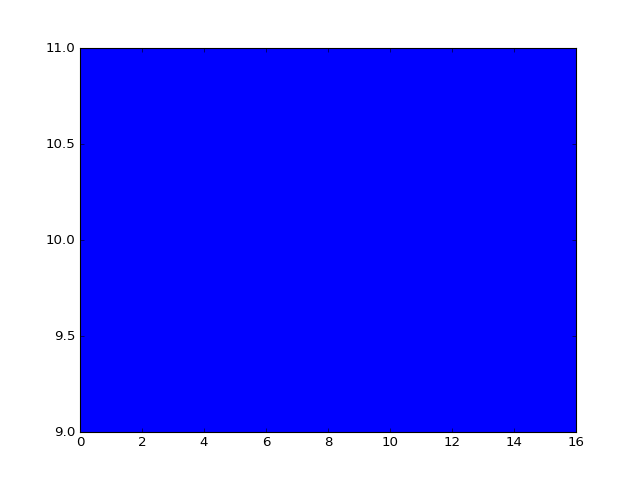

In [9]:
plt.figure()
plt.plot(time, process) # zoom in for details

In [10]:
counts = np.random.poisson(process)

<IPython.core.display.Javascript object>


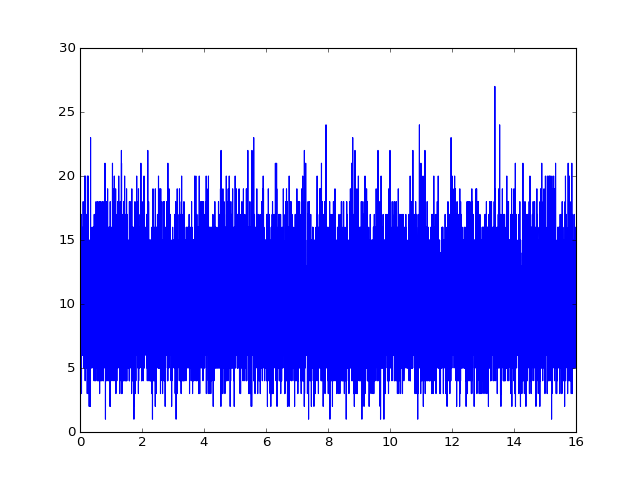

In [11]:
plt.figure()
plt.plot(time, counts)

In [12]:
lc = Lightcurve(time, counts)

In [13]:
ps = Powerspectrum(lc, norm="leahy")

**Question**: Without looking at the result, you should be able to tell what the first frequency will be, 
what the last frequency will be, and how many elements your power spectrum has. Enter your answers below.

* $\nu_{\mathrm{min}} = $
*  $\nu_{\mathrm{max}} = $
* $n_{\mathrm{frequencies}} = $

Now check the result. You can access the frequency array (at the centre of each frequency bin) as `ps.freq` (assuming you named your `Powerspectrum` object `ps`, otherwise substitute whatever name you gave it!).

In [14]:
fnyquist_theory = 0.5/dt
print("theoretical Nyquist frequency: " + str(fnyquist_theory))
minfreq_theory = 1./(tend-tstart)
print("theoretical minimum frequency: " + str(minfreq_theory))
nfreq_theory = len(counts)/2.
print("theoretical number of frequencies: " + str(nfreq_theory))

theoretical Nyquist frequency: 512.0
theoretical minimum frequency: 0.0625
theoretical number of frequencies: 8192.0


In [15]:
fnyquist_actual = ps.freq[-1]
print("actual Nyquist frequency: " + str(fnyquist_actual))
minfreq_actual = ps.freq[0]
print("actual minimum frequency: " + str(minfreq_actual))
nfreq_actual = len(ps.freq)
print("actual number of frequencies: " + str(nfreq_actual))

actual Nyquist frequency: 511.906253815
actual minimum frequency: 0.0624961853027
actual number of frequencies: 8191


The number of frequencies should be off by one from your theoretical prediction. Why? Because in Stingray, we have decided to *exclude* the zeroth frequency (the first element in the array) from the power spectrum. The reason for this is that the zeroth frequency is literally the power at a frequency of zero. In practical terms, this is also called the DC (direct current) component, and in Leahy normalization is always equal to the square of the number of photons in your power spectrum. Therefore, it doesn't add any information, which is why we exclude it (it is usually excluded in analyses, anyway). 

The minimum frequency should match, while the Nyquist frequency is slightly off due to the definition we used for the frequency array in terms of the center of the frequency bins rather than the edges.

In order to plot the result, you can use the attributes `freq`, which encodes the array of frequencies (at the centre of each frequency bin), and `power`, which encodes the array of corresponding powers.

You can try plotting in linear space or in log-log space. Try both. Under what circumstances do you think the log-log plot could be useful?

<IPython.core.display.Javascript object>


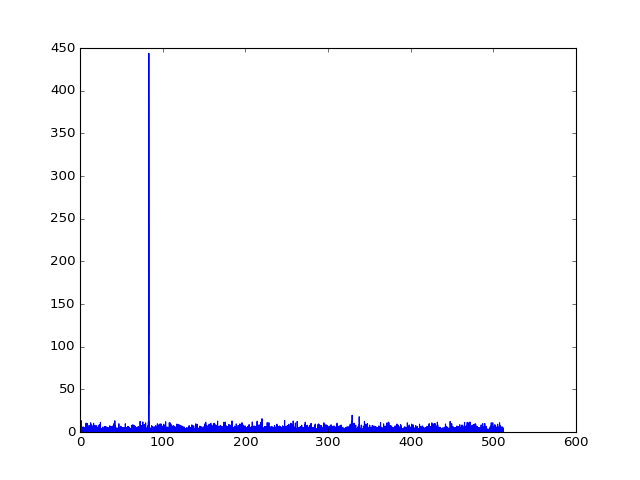

In [16]:
plt.figure()
plt.plot(ps.freq, ps.power, linestyle="steps-mid")

<IPython.core.display.Javascript object>


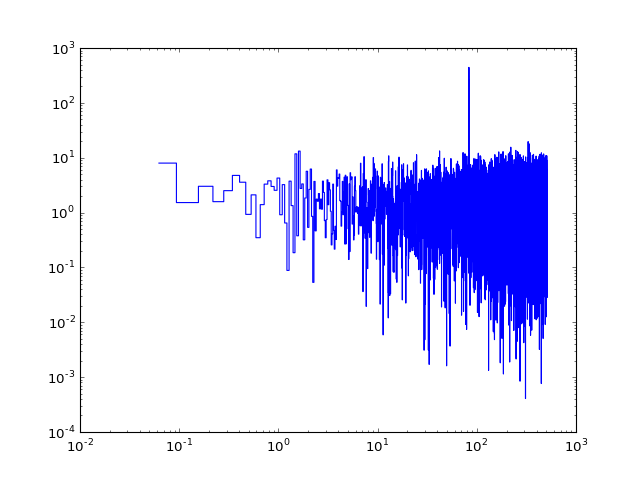

In [17]:
plt.figure()
plt.loglog(ps.freq, ps.power, linestyle="steps-mid")

The log-log plot is particularly useful if you have stochastic variability in your light curve at low frequencies. Standard stochastic processes create power-law (roughly) shaped power spectra at low frequencies. Because they are also noise processes, the variance in each frequency bin is proportional to the power in that frequency bin. If you plot this in linear scale (in y), the resulting powers might look like periodic signals because of their huge variance, even though they're a perfectly normal consequence of the statistical process that created the data (we'll see an example of this later).


You should see a huge spike and some noise. Do you? That's our periodic signal. Check that it is exactly at $1/p$, where $p$ is the period of your sine wave, by zooming into the plot.

Do you remember what the statistical distribution of the noise should be? If not, you can look up the distribution of a random variable that's defined as the sum of two normally distributed random variables.

Look at only the powers to the right of the periodic signal. Check whether they're distributed as you would expect given your answer above (if you didn't have a chance to figure it out, the solution is a $\chi^2$ distribution with 2 degrees of freedom). 

* Try plotting a (normalized) histogram (`matplotlib.pyplot.hist`) of your samples along with the PDF of the correct distribution
* Do a comparison between your sample and the correct distribution using a Kolmogorov-Smirnov test (also implemented in `scipy.stats`, it takes your array of noise powers and the cdf of a distribution implemented in scipy.stats as input).

Hint: The correct distribution is defined in `scipy.stats`. 

In [18]:
# find the index of some power close to the QPO 
minind = ps.freq.searchsorted(100.3)
# get the noise powers
noise_powers = ps.power[minind:]

In [19]:
import scipy.stats
# degrees of freedom for chisquare distribution
df = 2

# generate an x-grid for the chisquare distribution
x = np.linspace(scipy.stats.chi2.ppf(0.01, df),
                scipy.stats.chi2.ppf(0.99, df), 100)

# compute the values of the pdf at these values
chi2_theory = scipy.stats.chi2.pdf(x, df)

<IPython.core.display.Javascript object>


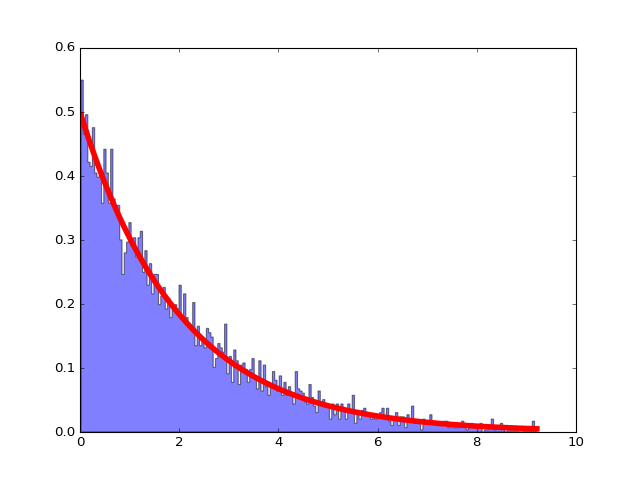

In [20]:
plt.figure()
plt.hist(noise_powers, bins=200, range=[x[0], x[-1]], histtype="stepfilled", normed=True, alpha=0.5)
plt.plot(x, chi2_theory, lw=5, color="red")

The plot looks pretty similar! Excellent! How about a formal comparison?

In [21]:
scipy.stats.kstest(noise_powers, scipy.stats.chi2(2).cdf)

KstestResult(statistic=0.011710007498098807, pvalue=0.32700918328103795)

The KS-test p-value should hopefully be quite large. This indicates that we cannot reject the null hypothesis (our null hypothesis is that our powers are distributed following a $\chi^2$ distribution with two degrees of freedom). This is, strictly speaking, not proof that the null hypothesis is true, but in practice, we have many powers in our noise power sample, and we expect a $\chi^2$ distribution to be the underlying distribution of our power spectrum. It's probably a pretty good assumption that the powers actually follow that distribution.

Okay, cool. For your next exercise, try out different combinations of the period amplitude and background count rate. 

* What happens if you make the amplitude much larger than the background count rate? (Hint: This should produce an error; think about why this produces an error)
* What happens to the power spectrum if the background count rate and period amplitude is really small? How large must the background counts and the amplitude be for you to see the periodic signal by eye? 
* What happens to the power spectrum if the background is large, but the period amplitude is small?
* Does the height of the peak in the power spectrum only depend on the absolute value of the amplitude, or does it depend on the ratio of the two?

**Solution**

First, a large amplitude and a small background rate:

In [22]:
bkg = 0.01
period = 0.012
amplitude = 10.0

time = np.linspace(tstart, tend, nbins)
process = amplitude*np.sin(2.*np.pi*time/period) + bkg
counts = np.random.poisson(process)

ValueError: lam < 0

This produces an error. To see why, plot the process (the  without adding Poisson errors:

<IPython.core.display.Javascript object>


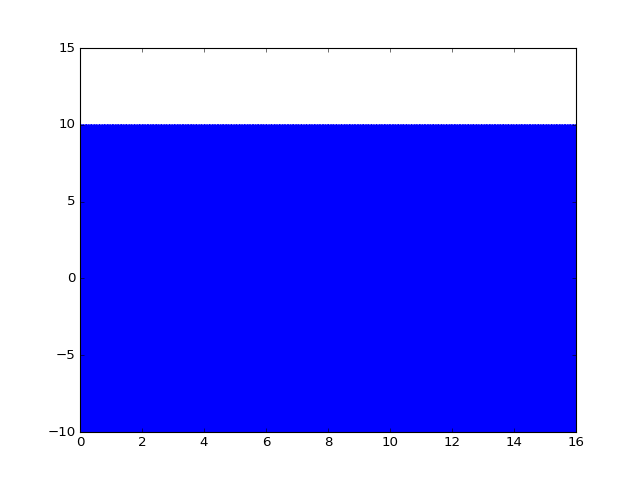

In [24]:
plt.figure()
plt.plot(time, process)

As you can see, the process creating the data goes below zero! This is impossible in real life, since the brightness of a source cannot go below zero (it either emits photons, or it doesn't; but it certainly never emits negative photons!). You cannot sample from a Poisson distribution with a rate $<0$, therefore `numpy` throws an error.

Second case: small amplitude and small background count rate:

In [25]:
bkg = 0.001
period = 0.012
amplitude = 0.0005

time = np.linspace(tstart, tend, nbins)
process = amplitude*np.sin(2.*np.pi*time/period) + bkg
counts = np.random.poisson(process)

In [26]:
lc = Lightcurve(time, counts)
ps = Powerspectrum(lc, norm="leahy")

<IPython.core.display.Javascript object>


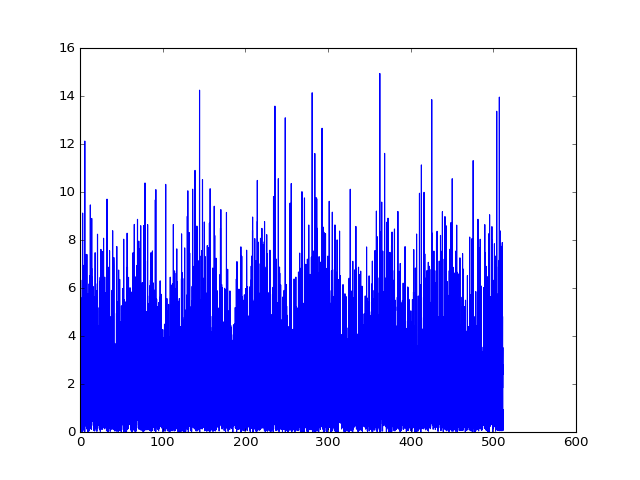

In [27]:
plt.figure()
plt.plot(ps.freq, ps.power)

The height of the peak in the power spectrum depends both on the relative amplitude of background and amplitude, as well as on the absolute value of the amplitude. If there are *very* few counts in the data, it is very hard to see any periodic signal, no matter if the sine wave amplitude is comparable to the background amplitude. The reason for this is in the properties of the Poisson process used to generate the data. If your average count rate in the spectrum is only $0.0001$, then you're rarely ever get a photon in your time series, and most time bins will have no photons. With only a few handfuls of photons, it will be *really* hard to see any periodic signal at all, unless you're extremely lucky. 

It also depends on the relative ratio of the two: if the amplitude of the periodic signal is much, much smaller than the background amplitude, then the periodic signal will be effectively drowned out by the Poisson fluctuations, which are dominated by the background amplitude. 

This shows you two things: for measuring weak signals, you want an instrument with high sensitivity and low background.

#### Finding a QPO

To formally assess the significance of a periodic signal, you can use the formalism laid out in [Groth, 1975](http://adsabs.harvard.edu/abs/1975ApJS...29..285G) (don't read this paper unless you're actually interested in the intricate details of how to find a periodic signal in noise). The gist of the paper is that it computes the probability of obtaining a power as high as the one in question under the null hypothesis that there is no periodic signal in the data. Again, in principle, the resulting p-value only allows you to reject the null hypothesis that the power spectrum is only white noise. In practice, *if* your light curve is strictly constant, and *if* the only alternative possibility is a periodic signal, then you may be able to conclude that there is a periodic signal if the null hypothesis is rejected. Note: This is formally incorrect! However, it works well in practice (though the literature also contains claims of periods that are clearly not correct), and someone has yet to come up with a fully Bayesian solution to this problem.

In practice, as we've seen in the lecture, the assumption of a constant light curve is very often broken, making the analysis much more complex.

Here, however, let's assume it's true (and in fact, because we've simulated the data, we know it's true!). Let's make another data set and then assess its significance:

In [28]:
bkg = 10.0
period = 0.01
amplitude = 0.3

time = np.linspace(tstart, tend, nbins)
process = amplitude*np.sin(2.*np.pi*time/period) + bkg
counts = np.random.poisson(process)

In [29]:
lc = Lightcurve(time, counts)
ps = Powerspectrum(lc, norm="leahy")

<IPython.core.display.Javascript object>


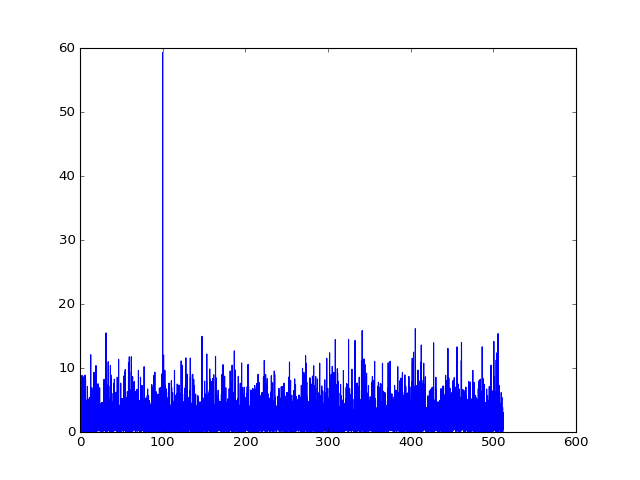

In [30]:
plt.figure()
plt.plot(ps.freq, ps.power)

First, find the power at 100 Hz:

In [31]:
p_ind = ps.freq.searchsorted(99.95)
ps.power[p_ind]

59.305484729033694

The formalism in Groth (1975) is implemented in Stingray as a method of `Powerspectrum`. You can call it like this:

    In []: res = ps.classical_significances()
    
The result is a list with two elements. The first is a list of indices, where each index is the index of the frequency bin, and a list of corresponding p-values for the null hypothesis that there is no periodic signal in the data. The method takes a keyword `threshold`, which sets the significance level for p-values to be reported. For example, if you set a threshold of 0.01, only p-values smaller than 0.01 will be in the list returned. This allows you to do easy significance tests. By default, the threshold is set to 1, which means that all p-values will be reported.

* What would you consider a good/useful threshold for using here? Why? Use this threshold. How many p-values are reported? 
* Try out different thresholds. How many p-values are reported for a threshold of [0.1, 0.05, 0.01, 0.001, 1e-6]?
* Say you set a significance level of 0.01. That means that in principle, under the assumptions made above, you consider all frequencies where a p-value is $<0.01$ to contain a periodic signal. Given what you know about the data you simulated, do you think that is reasonable? Why (not)?
* What could you do to make your inference more robust to this problem? Hint: you may want to look at the docstring of the `classical_significances` method.

In [32]:
# Returning all p-values
res = ps.classical_significances()
pvals = res[1]

In [33]:
# pring the p-values
res[1]

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
         8.18800000e+03,   8.18900000e+03,   8.19000000e+03])

In [34]:
# what's the smallest pvalue?
np.min(res[0])

1.3242732844437852e-13

In [35]:
# Which frequency does that p-value correspond to?
ps.freq[np.where(res[0] == np.min(res[0]))[0][0]]

99.993896484375

That's our QPO! Let's look at a threshold of 0.01. How many p-values do I get?

In [36]:
len(pvals[pvals < 0.01])

1

In [37]:
indices = res[1]
pvals = res[0]
print("The number of p-values < 0.01 is %i "%len(pvals[pvals < 0.01]))

The number of p-values < 0.01 is 90 


There are 91 p-values below 0.01! Do we have QPOs at all of these frequencies? Of course not! There's a single sinen wave in the data! So what happened? Well, let's see how many frequencies we've searched:

In [38]:
len(pvals)

8191

We've searched 8191 frequencies. Remember the definition of the p-value: For a p-value of 0.01, by definition, in 1\% of repetitions of the same experiment, I will reject the null hypothesis even though it is true. We've searched 8191 different frequencies, which means that we'll expect that $0.01*8191 \sim 82$ times the null hypothesis will be rejected even though it is True. This is what happens here. 

Generally, you can correct for this by moving the threshold to a smaller value to account for the number of frequencies searched. This is already implemented in the method, by setting `trial_correction=True`. Let's do that:

In [39]:
res = ps.classical_significances(threshold=0.01, trial_correction=True)

In [40]:
res

array([[  1.32427328e-13],
       [  1.59900000e+03]])

Now we only report the actual periodic signal we put in!

As a last step, we'd like to know the fractional rms amplitude of this periodic signal. The fractional rms amplitude tells you the fraction of the total variance that's contained in your periodic signal. 

* Recompute the power spectrum, but set `norm="frac"`. Plot this and compare it to the power spectrum in Leahy normalization. What has changed?
* The fractional rms is defined as the standard deviation divided by the mean of your light curve. In fractional rms normalization, this should equal the integral of the power spectrum. Check that this is indeed the case. Hint: In rms normalization, this is easily computed by multiplying your powers by the frequency resolution and adding them all up. Be aware, however, that you should only add *one half* of the last frequency bin.
* Compute the fractional rms of the periodic signal.


In [41]:
ps_frac = Powerspectrum(lc, norm="frac")

<IPython.core.display.Javascript object>


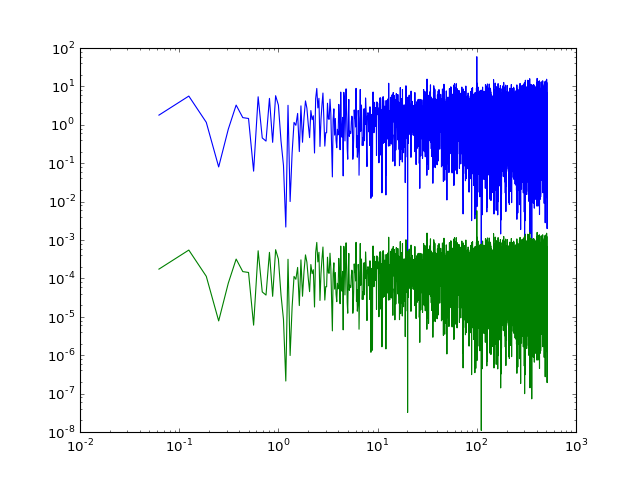

In [42]:
plt.figure()
plt.loglog(ps.freq, ps.power)
plt.loglog(ps_frac.freq, ps_frac.power)

It looks the like the power spectrum is essentially the same, just shifted downward on the y-axis. Notice, however, the log-scaled y-axis.

Let's now look at the fractional rms normalization:

In [43]:
frac_rms = np.sqrt(np.var(lc.counts))/np.mean(lc.counts)
print("The fractional rms of the light curve is %.4f"%frac_rms)

The fractional rms of the light curve is 0.3173


In [44]:
frac_ps = np.sqrt(np.sum(ps_frac.power[:-1]*ps_frac.df) + 0.5*ps_frac.power[-1]*ps.df)
print("The fractional rms derived from the power spectrum is %.4f"%frac_ps)

The fractional rms derived from the power spectrum is 0.3173


That looks good!

Now we can compute the fractional rms in the periodic signal alone:

In [45]:
periodic_power = ps_frac.power[1599]
print("power in the frequency with the periodic signal: " + str(periodic_power))


power in the frequency with the periodic signal: 0.0057949465339


In [46]:
frac_rms_period = np.sqrt(periodic_power*ps_frac.df)
print("The fractional rms in the periodic signal is " + str(frac_rms_period))

The fractional rms in the periodic signal is 0.0190305557565


So about two percent of the total variance can be explained by the periodic signal.

## Find the Periodic Signal

Okay, having done this for data we've simulated ourselves, you now get to do this on a data set you *don't* know. 
Using everything we've learned in the previous exercise, the goal is to assess whether there is a periodic signal in the data.

The data should be in the same folder as the notebook, and it's in a simple text file, so you can simply load it using `numpy`:

In [47]:
times = np.loadtxt("periodsearch1.txt")

The data is a list of times of arrival: individual photon arrival times at the detector. This is *not* a light curve. It is not binned! Therefore, we'll need to bin it ourselves. Unfortunately, the scientist who gave you the data has not told you what instrument the data came from, and they're not answering e-mails. This means you don't know what the time resolution of the data is! You're going to have to guess.


* Take a look at the data. You can compute, for example, the total duration of the observation. You can also try to see if you can infer the time resolution from the data (Hint: a histogram of some derived quantity might help!)
* If you can't figure out the time resolution from the data, pick one. You can try different time resolutions. Hint: Stingray allows you to make a light curve out of times of arrival data using the following syntax (where `dt` is your time resolution, and you can set the duration of your observation `tseg` and the start time of your observation `tstart` by hand, if you know it):

        In []: Lightcurve.make_lightcurve(times, dt, tseg=None, tstart=None)

* Now compute the power spectrum of the light curve you just created. Is there a period in the data?
* Compare your results with your neighbours. Do you all get the same results? If yes, try out different time resolutions: try a time resolution that's a multiple of your current time resolution. Try a time resolution that's 1.2 times your current time resolution. Do you still get the same results? 
* Think about why you might have gotten the results you've seen (This one is difficult; you might want to look at the raw times of arrival again, and additionally look up *aliasing*).

In [48]:
# compute the total duration of the observation
tseg = np.max(times) - np.min(times)
print("The total duration of the data set is %.4f"%tseg)

The total duration of the data set is 10.0000


<IPython.core.display.Javascript object>


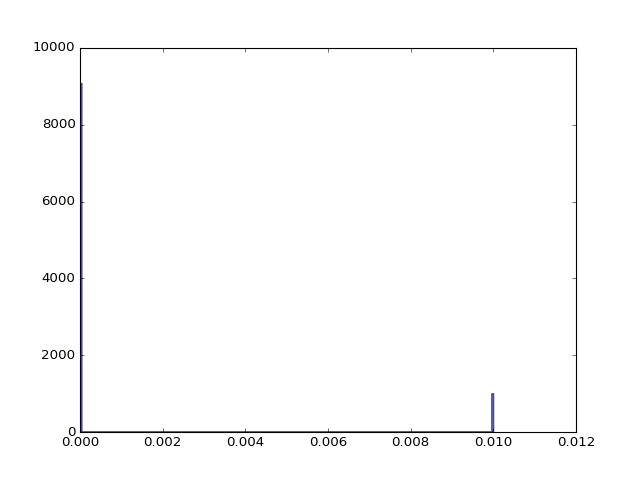

In [49]:
# to look at the time resolution, let's look at the intervals between photons
dt_all = np.diff(times)

# let's plot a histogram the time intervals between photons

plt.figure()
plt.hist(dt_all, bins=200, histtype="stepfilled", alpha=0.6);

There are two peaks. Most of the arrival times are zero, the rest are exactly 0.01. This is a strong hint that the actual time resolution of your data set is 0.01. 

So let's make a light curve with that time resolution:

In [50]:
lc = Lightcurve.make_lightcurve(times, dt=0.01)

Let's plot that light curve:

<IPython.core.display.Javascript object>


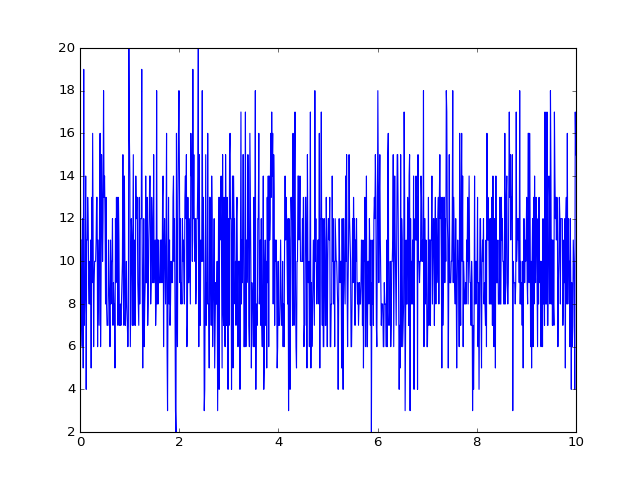

In [51]:
plt.figure()
plt.plot(lc.time, lc.counts)

What does the power spectrum look like?

In [52]:
ps = Powerspectrum(lc, norm="leahy")

<IPython.core.display.Javascript object>


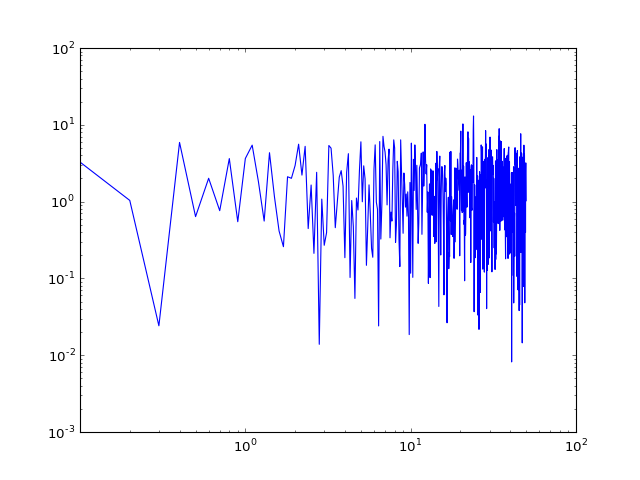

In [53]:
plt.figure()
plt.loglog(ps.freq, ps.power)

That looks pretty boring! Let's look at a slightly different time resolution.

<IPython.core.display.Javascript object>


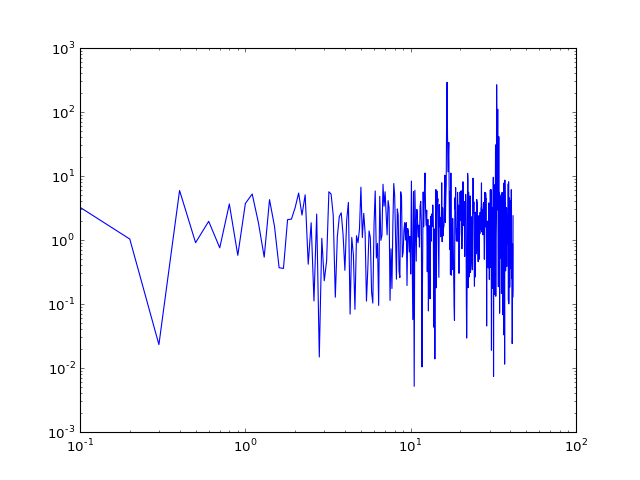

In [54]:
lc = Lightcurve.make_lightcurve(times, dt=0.012)
ps = Powerspectrum(lc, norm="leahy")

plt.figure()
plt.loglog(ps.freq, ps.power)

Oh look! There seem to be two periodic signals! One is near 16 Hz or so, the other at a bit over 30 Hz. It looks like the second could be a harmonic of the first. Harmonics essentially encode non-sinusoidal variations in a periodic signal.

Let's try yet another time resolution:

<IPython.core.display.Javascript object>


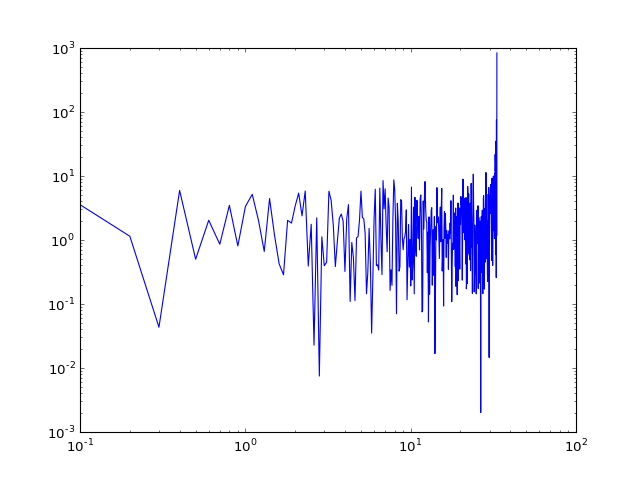

In [55]:
lc = Lightcurve.make_lightcurve(times, dt=0.015)
ps = Powerspectrum(lc, norm="leahy")

plt.figure()
plt.loglog(ps.freq, ps.power)

Now there seems to be some rising power just at the Nyquist frequency, but the periods are gone again!

<IPython.core.display.Javascript object>


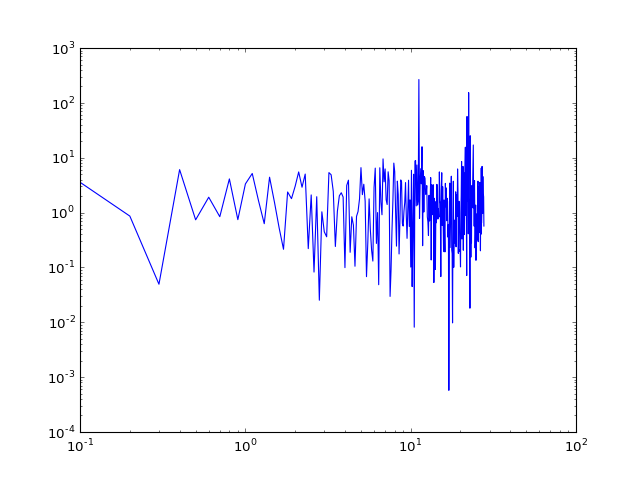

In [56]:
lc = Lightcurve.make_lightcurve(times, dt=0.018)
ps = Powerspectrum(lc, norm="leahy")

plt.figure()
plt.loglog(ps.freq, ps.power)

And again we see two signals, but the frequencies have moved! How is this possible?

Well, what we're seeing here is *not* a physical effect. In the same data set, your periods should generally not appear and disappear when you change the time resolution (especially not when they're as strong as here). Likewise, they definitely shouldn't move frequency. This is usually a sign that something's wrong with your data.

Let's take a closer look at the data I gave you:

In [57]:
times[:30]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.01001001,  0.01001001,  0.01001001,  0.01001001,  0.01001001,
        0.01001001,  0.01001001,  0.01001001,  0.01001001,  0.01001001,
        0.01001001,  0.02002002,  0.02002002,  0.02002002,  0.02002002])

As you can see, the first 15 values of the array are zero. The next 11 values are all the same. What happened here?
Some X-ray telescopes record a binned light curve at a fairly coarse time resolution. The result in the instrument will be a series of time stamps and the number of counts for each bin. The data processing software sometimes turns this into an event list, i.e. makes a single event for each count in each bin, and assigns as arrival time the start time of that bin. This is how you end up with duplicate arrival times. Since you don't know the time resolution, you might have guessed one that was not the same as the original time resolution used. Unless it was an integer multiple of the intrinsic time resolution, you fall prey to the effect of aliasing: the intrinsic time resolution and that you used combine in such a way to induce a periodic signal at the lowest common multiple of the two time scales.

The real time resolution of the light curve is $0.01$. If you use a time resolution of 0.012$ to create your light curve and power spectrum, the two time scales interfere at the lowest common multiple, $0.06$, leading to an observable signal at $16.6$ Hz. The harmonic at exactly twice that frequency is caused by the non-sinusoidal structure the interference creates. Of course, the frequency of the periodic signal must change as we change the time resolution used for binning, since the lowest common multiple changes, too.

Does that mean we've found a periodic signal in this data set? No, we haven't! The effect here is caused purely by the data analysis. There is nothing in the light curve I gave you.

How can we deal with aliasing? Well, the simplest variety is to just bin at the time resolution of the instrument. That should usually be known from the spacecraft manual, and can therefore be used to bin the light curve effectively. However, be aware that some instruments have a time resolution that varies *slightly* from bin to bin. In this case, you might end up with a spurious signal in your power spectrum anyway.

One simple trick is to randomize the photons within the bin. This works pretty well, but be aware that this makes the (strong) assumption that the time series is actually a series of flat step functions (which, in practice, it is certainly not). This can lead to incorrect conclusions when the underlying process changes in brightness very rapidly. It is also generally not a good idea to bin at a higher time resolution than the instrument supports.

Let's try some randomization:

In [58]:
time_bins = np.unique(times)
counts = np.array([len(np.where(times == u)[0]) for u in time_bins])
dt = np.diff(time_bins)[0] # time resolution
print("The time resolution is " + str(dt))

The time resolution is 0.01001001001


In [59]:
counts[:10]

array([15, 11, 11,  7,  6, 12,  5, 19,  7,  8])

Now we can make the randomized arrivals:

In [60]:
randomized_arrivals = [] #
for t, c in zip(time_bins, counts):
    tstart = t
    tend = t + dt
    arrivals = np.random.uniform(tstart, tend, size=c)
    
    randomized_arrivals.extend(arrivals)
    

Now we can try again to make a light curve with a chosen time resolution, and the periodic signal should be gone:

<IPython.core.display.Javascript object>


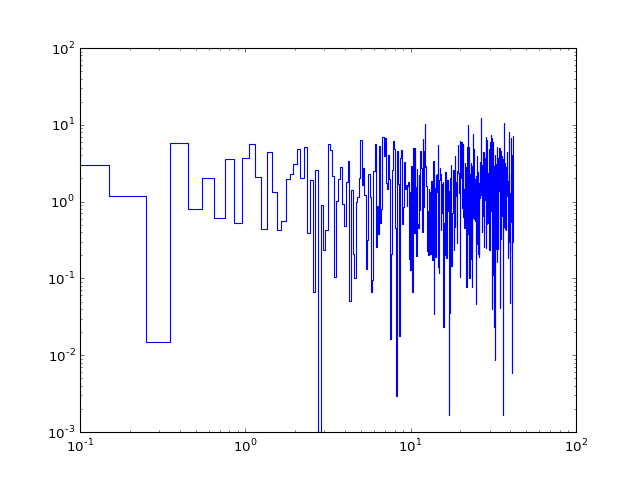

In [61]:
lc = Lightcurve.make_lightcurve(randomized_arrivals, dt=0.012)
ps = Powerspectrum(lc, norm="leahy")

plt.figure()
plt.loglog(ps.freq, ps.power, linestyle="steps-mid")

And as expected, the periodic signal has vanished!